In [32]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf


import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

#한글 사용
from matplotlib import rc  
rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False  

data1 = pd.read_csv('데이터최종본.csv')

data1.head(10000)

,행정구역코드,시도명,시군구명,읍면동명,혼잡시간강도,혼잡빈도강도,전체추정교통량,등록차수,교통량,승용차 추정교통량,버스 추정교통량,화물차 추정교통량,주차장혼잡평균
0,1101053,서울특별시,종로구,사직동,95.12,90.43,18445,8170,2.257650,15038,100,3307,4.411215
1,1101054,서울특별시,종로구,삼청동,53.03,32.45,9841,777,12.665380,8195,39,1607,44.736760
2,1101055,서울특별시,종로구,부암동,74.40,60.51,17090,3140,5.442675,13951,107,3032,42.711838
3,1101056,서울특별시,종로구,평창동,59.39,45.55,13694,6609,2.072023,11105,86,2503,19.598131
4,1101057,서울특별시,종로구,무악동,67.78,36.04,25492,2796,9.117310,20986,142,4364,76.590343
...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,1125070,서울특별시,강동구,둔촌1동,48.73,21.40,36721,545,67.377982,28898,289,7534,84.754673
418,1125071,서울특별시,강동구,둔촌2동,54.40,28.98,13926,7998,1.741185,10434,66,3426,8.111371
419,1125072,서울특별시,강동구,암사1동,68.03,39.04,10201,10427,0.978326,7442,32,2727,5.989097
420,1125073,서울특별시,강동구,천호2동,59.84,42.78,21284,9412,2.261368,16095,254,4935,14.933022


In [33]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   행정구역코드     422 non-null    int64  
 1   시도명        422 non-null    object 
 2   시군구명       422 non-null    object 
 3   읍면동명       422 non-null    object 
 4   혼잡시간강도     422 non-null    float64
 5   혼잡빈도강도     422 non-null    float64
 6   전체추정교통량    422 non-null    int64  
 7   등록차수       422 non-null    int64  
 8   교통량        422 non-null    float64
 9   승용차 추정교통량  422 non-null    int64  
 10  버스 추정교통량   422 non-null    int64  
 11  화물차 추정교통량  422 non-null    int64  
 12  주차장혼잡평균    422 non-null    float64
dtypes: float64(4), int64(6), object(3)
memory usage: 43.0+ KB


<Axes: >

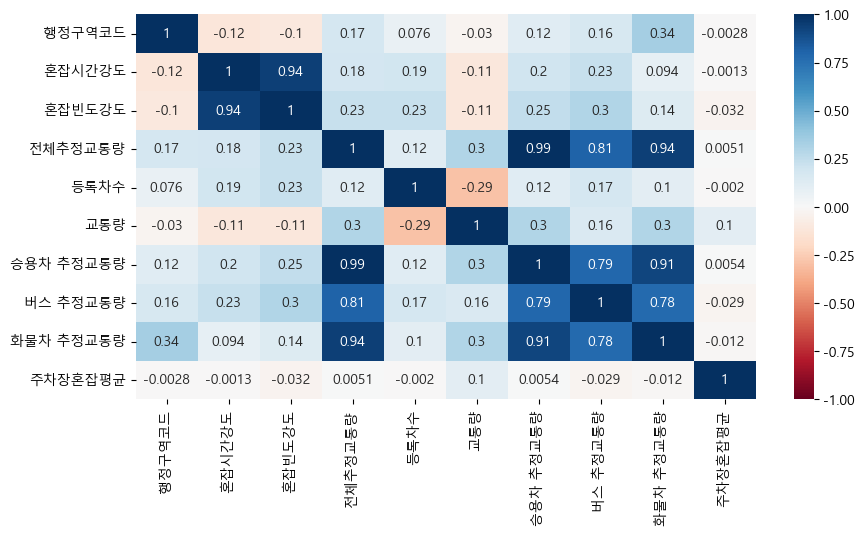

In [34]:
#상관계수 표현
df=data1
df
temp = df.select_dtypes(include=['object']).columns #열의 data 타입==문자열
new=df.drop(columns=temp) # 문자열 데이터 삭제한 새로운 데이터 생성
df_corr=new.corr(method = 'pearson')  #상관계수 구하기

# 그래프에서 한글 표기를 위한 글꼴 경로 설정
plt.rc('font',family = 'Malgun Gothic')


# #음의 상관계수(하나 증가 다른것 감소, ===>반비례)
# #양의 상관계수(하나가 증가할때 다른것도 증가하면, 하나가 감소 다른것도 감소===>비례)
# #0(상관 관계 X)

fig,ax =plt.subplots(figsize=(10,5))
# 상관계수 표 그림으로 표현(이 부분 빼면 그냥 표로 나옴)
sns.heatmap(df_corr,
            annot=True, # 박스안 데이터 값 자동 입력
            vmin=-1,vmax=1, # 최소 최대 색깔 지정
            cmap='RdBu'  # 색깔 테마 선택
       )

In [35]:
#y=혼잡시간강도에 따른 변수선택
import statsmodels.api as sm
import pandas as pd

# 후진 소거법을 위한 함수 정의
def backward_elimination(data, target_col, significance_level=0.05):
    variables = data.columns.tolist()
    variables.remove(target_col)
    
    while len(variables) > 0:
        X = sm.add_constant(data[variables])
        y = data[target_col]
        model = sm.OLS(y, X).fit()
        p_values = model.pvalues[1:]
        max_p_value = p_values.max()
        
        if max_p_value >= significance_level:
            remove_variable = p_values.idxmax()
            variables.remove(remove_variable)
        else:
            break
    
    return variables

# 후진 소거법 함수 호출
selected_variables = backward_elimination(new, '혼잡시간강도')
print(selected_variables)

['혼잡빈도강도', '버스 추정교통량']


In [36]:
## 선형회귀분석
## 종속변수 : 혼잡시간강도
## 독립변수 : 혼잡빈도강도, 버스추정교통량

# 독립 변수
independent_vars = ['혼잡빈도강도', '버스 추정교통량']

# 종속 변수
dependent_var = '혼잡시간강도'

# 상수항(Intercept)을 추가
X = sm.add_constant(data1[independent_vars])

# 선형 회귀 모델 생성
model = sm.OLS(data1[dependent_var], X)

# 모델 피팅
results = model.fit()

# 회귀 분석 결과 출력
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 혼잡시간강도   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1582.
Date:                Fri, 12 Jan 2024   Prob (F-statistic):          5.52e-196
Time:                        16:01:56   Log-Likelihood:                -1242.8
No. Observations:                 422   AIC:                             2492.
Df Residuals:                     419   BIC:                             2504.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3052      0.632     57.443      0.000      35.063      37.548
혼잡빈도강도         0.6892      0.013     54.536      0.000       0.664       0.714
버스 추정교통량      -0.0034      0.001     -3.159      0.002      -0.006      -0.001
==============================================================================
Omnibus:                       23.982   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.551
Skew:                          -0.486   Prob(JB):                     2.32e-07
Kurtosis:                       3.889   Cond. No.                         831.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

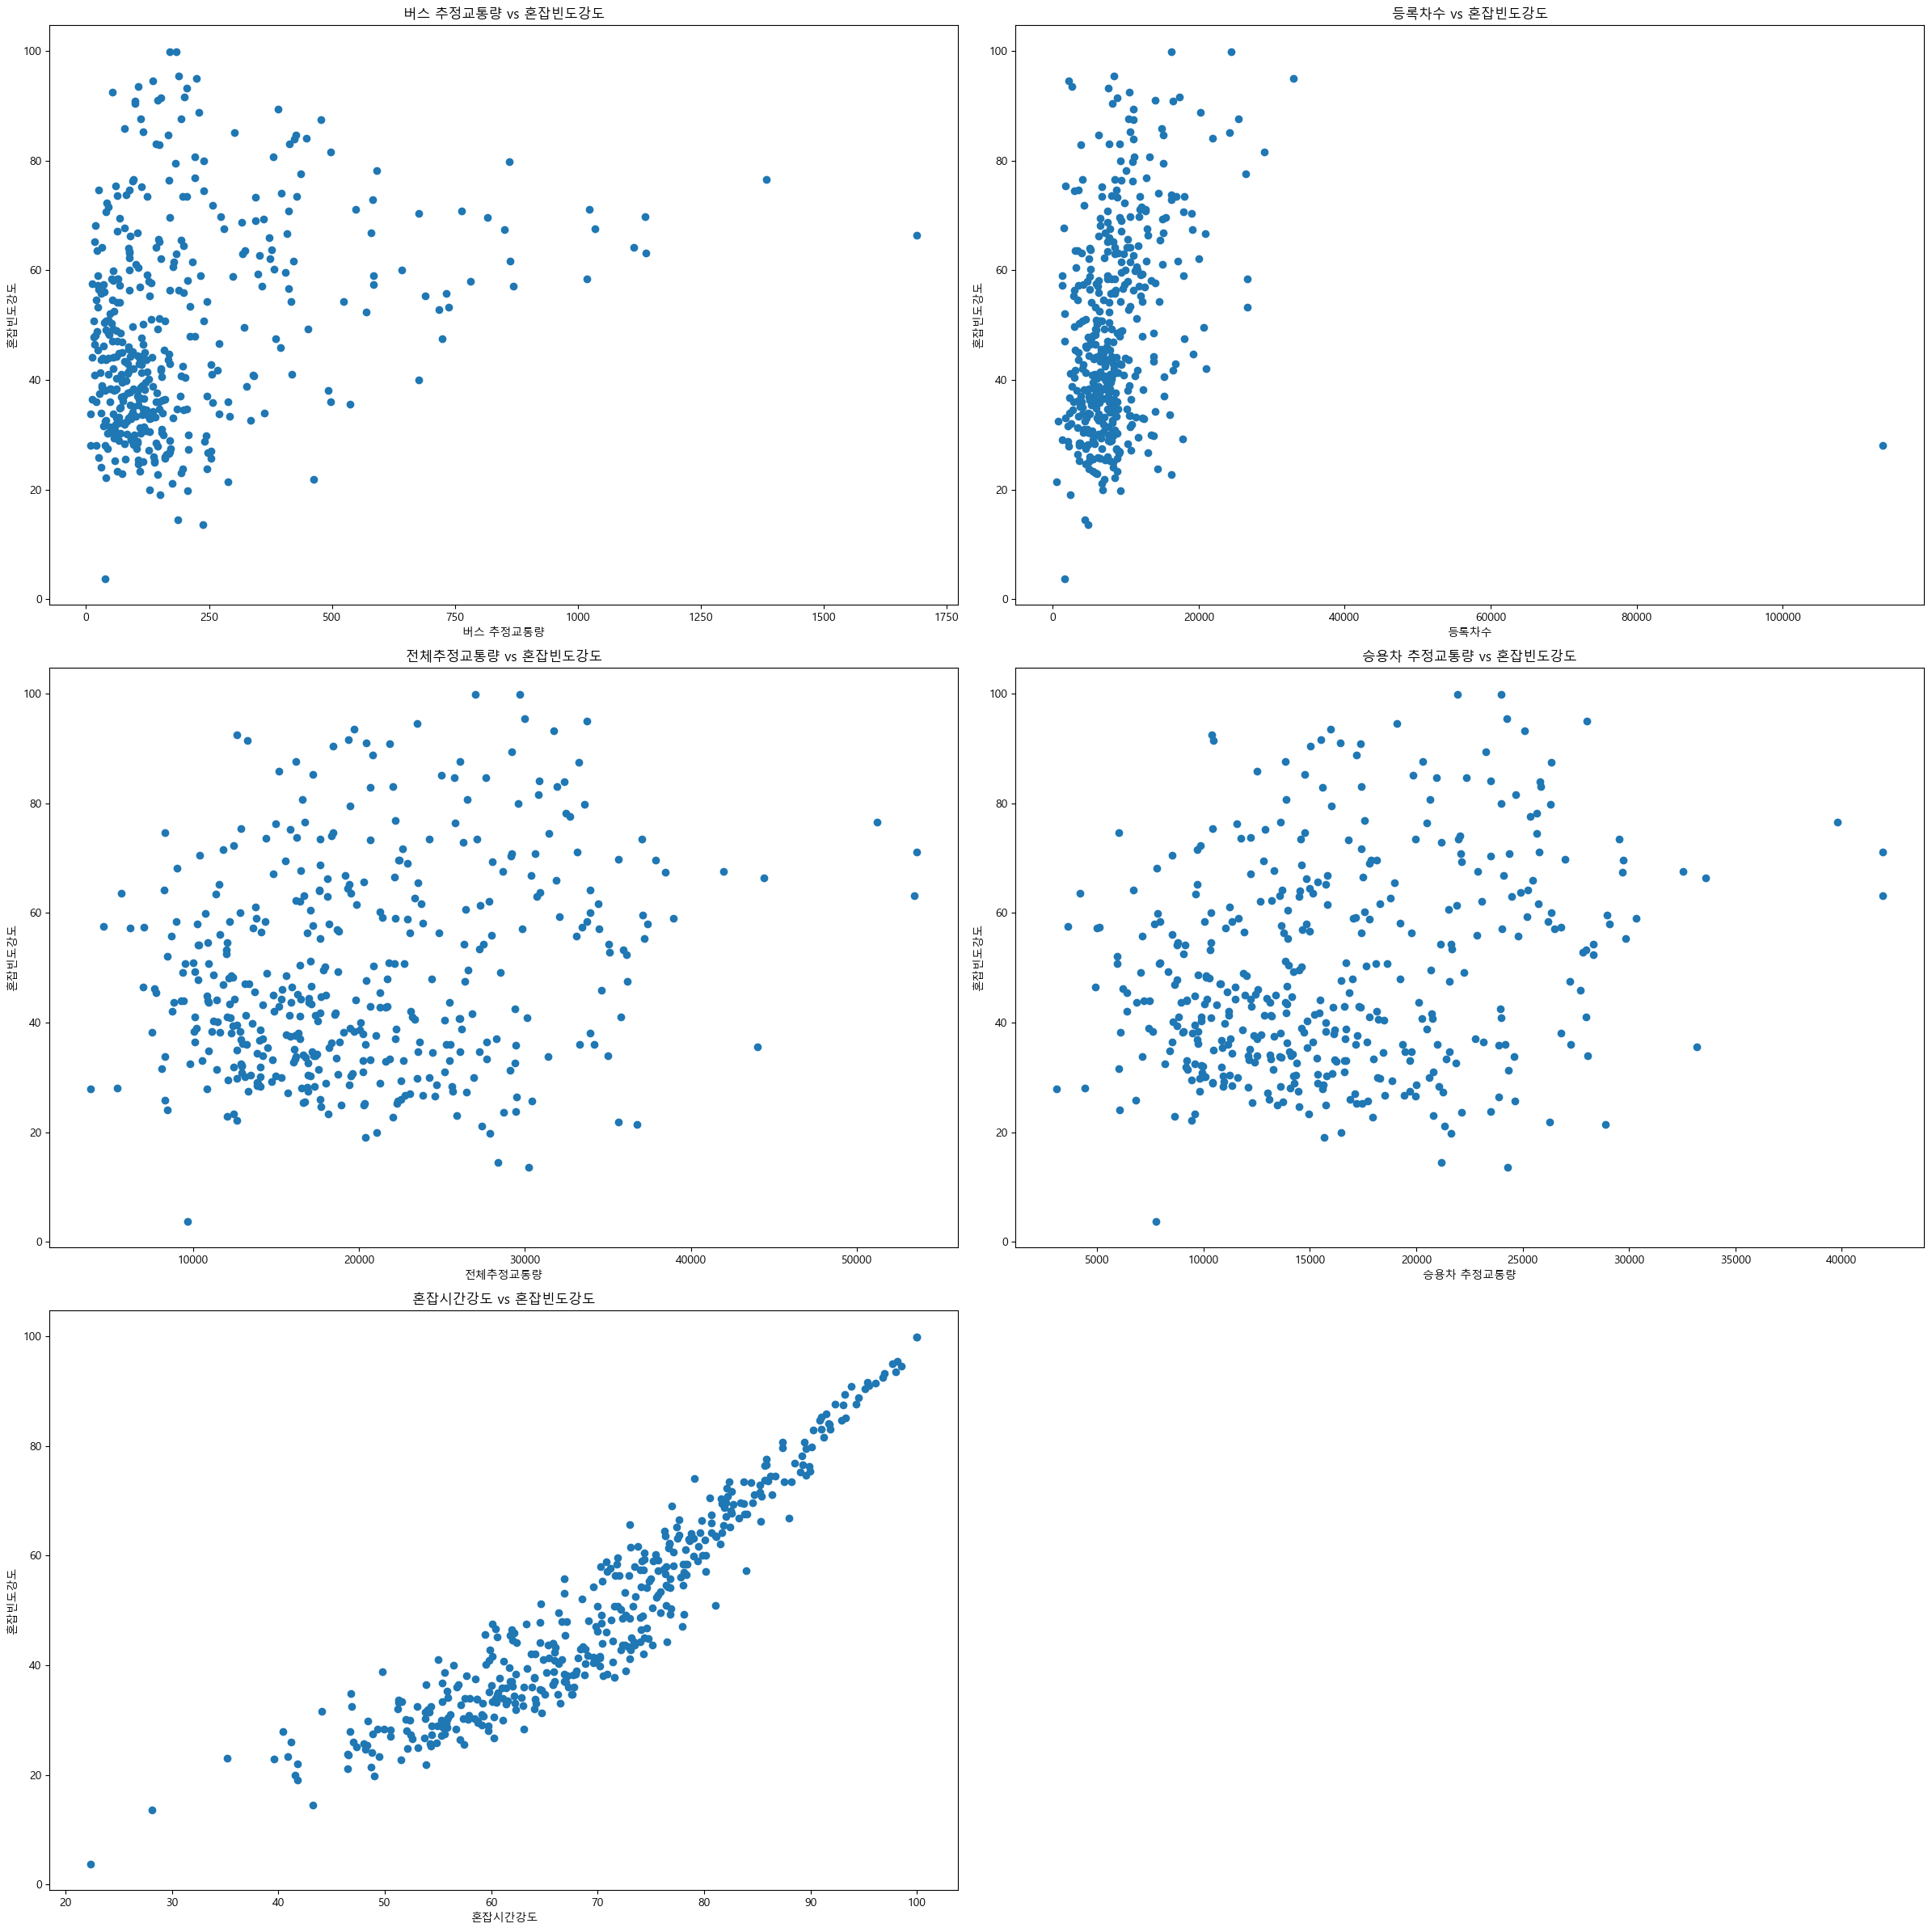

In [37]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"  # 맥 사용자의 경우
# font_name = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font_name)

# 산점도 그리기
plt.figure(figsize=(24, 24))

# 혼잡시간강도
plt.subplot(3, 2, 5)
plt.scatter(data1['혼잡시간강도'], data1['혼잡빈도강도'])
plt.title('혼잡시간강도 vs 혼잡빈도강도')
plt.xlabel('혼잡시간강도')
plt.ylabel('혼잡빈도강도')

# 전체추정교통량
plt.subplot(3, 2, 3)
plt.scatter(data1['전체추정교통량'], data1['혼잡빈도강도'])
plt.title('전체추정교통량 vs 혼잡빈도강도')
plt.xlabel('전체추정교통량')
plt.ylabel('혼잡빈도강도')

# 등록차수
plt.subplot(3, 2, 2)
plt.scatter(data1['등록차수'], data1['혼잡빈도강도'])
plt.title('등록차수 vs 혼잡빈도강도')
plt.xlabel('등록차수')
plt.ylabel('혼잡빈도강도')

# 승용차 추정교통량
plt.subplot(3, 2, 4)
plt.scatter(data1['승용차 추정교통량'], data1['혼잡빈도강도'])
plt.title('승용차 추정교통량 vs 혼잡빈도강도')
plt.xlabel('승용차 추정교통량')
plt.ylabel('혼잡빈도강도')

# 버스 추정교통량
plt.subplot(3, 2, 1)
plt.scatter(data1['버스 추정교통량'], data1['혼잡빈도강도'])
plt.title('버스 추정교통량 vs 혼잡빈도강도')
plt.xlabel('버스 추정교통량')
plt.ylabel('혼잡빈도강도')

plt.tight_layout()
plt.show()
